<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 04 Validating The Prediction Model

### Riccardo Spolaor (864877)

</center>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import python_files.ValidationOperations as valop


In [2]:
dataframe = pd.read_csv('./datasets/dataframe0.csv', low_memory = False)

In [3]:
dataframe.columns.values

array(['Winner', 'csvID', 'ATP', 'Location', 'Tournament', 'Series',
       'Court', 'Round', 'Best of', 'RankFilledA', 'RankFilledB',
       'PtsFilledA', 'PtsFilledB', 'MaxFilledA', 'MaxFilledB',
       'AvgFilledA', 'AvgFilledB', 'Carpet', 'Clay', 'Grass', 'Hard',
       'FEDERER R.A', 'FEDERER R.B', 'NADAL R.A', 'NADAL R.B',
       'DJOKOVIC N.A', 'DJOKOVIC N.B', 'MURRAY A.A', 'MURRAY A.B',
       'RODDICK A.A', 'RODDICK A.B', 'FERRER D.A', 'FERRER D.B',
       'BERDYCH T.A', 'BERDYCH T.B', 'HEWITT L.A', 'HEWITT L.B',
       'DEL POTRO J. M.A', 'DEL POTRO J. M.B', 'TSONGA J.W.A',
       'TSONGA J.W.B', 'CILIC M.A', 'CILIC M.B', 'WAWRINKA S.A',
       'WAWRINKA S.B', 'GASQUET R.A', 'GASQUET R.B', 'NISHIKORI K.A',
       'NISHIKORI K.B', 'MONFILS G.A', 'MONFILS G.B', 'FERRERO J.C.A',
       'FERRERO J.C.B', 'ROBREDO T.A', 'ROBREDO T.B', 'NALBANDIAN D.A',
       'NALBANDIAN D.B', 'RAONIC M.A', 'RAONIC M.B', 'AGASSI A.A',
       'AGASSI A.B', 'HAAS T.A', 'HAAS T.B', 'ISNER J.A', 'ISNER

In [4]:
dataframe.columns.values

array(['Winner', 'csvID', 'ATP', 'Location', 'Tournament', 'Series',
       'Court', 'Round', 'Best of', 'RankFilledA', 'RankFilledB',
       'PtsFilledA', 'PtsFilledB', 'MaxFilledA', 'MaxFilledB',
       'AvgFilledA', 'AvgFilledB', 'Carpet', 'Clay', 'Grass', 'Hard',
       'FEDERER R.A', 'FEDERER R.B', 'NADAL R.A', 'NADAL R.B',
       'DJOKOVIC N.A', 'DJOKOVIC N.B', 'MURRAY A.A', 'MURRAY A.B',
       'RODDICK A.A', 'RODDICK A.B', 'FERRER D.A', 'FERRER D.B',
       'BERDYCH T.A', 'BERDYCH T.B', 'HEWITT L.A', 'HEWITT L.B',
       'DEL POTRO J. M.A', 'DEL POTRO J. M.B', 'TSONGA J.W.A',
       'TSONGA J.W.B', 'CILIC M.A', 'CILIC M.B', 'WAWRINKA S.A',
       'WAWRINKA S.B', 'GASQUET R.A', 'GASQUET R.B', 'NISHIKORI K.A',
       'NISHIKORI K.B', 'MONFILS G.A', 'MONFILS G.B', 'FERRERO J.C.A',
       'FERRERO J.C.B', 'ROBREDO T.A', 'ROBREDO T.B', 'NALBANDIAN D.A',
       'NALBANDIAN D.B', 'RAONIC M.A', 'RAONIC M.B', 'AGASSI A.A',
       'AGASSI A.B', 'HAAS T.A', 'HAAS T.B', 'ISNER J.A', 'ISNER

In [3]:
%%time
best_dataframe_split_index = valop.get_best_dataframe_split(dataframe)

KeyboardInterrupt: 

In [ ]:
dataframe = dataframe[dataframe['csvID'] >= best_dataframe_split_index]

dataframe.head()

Best Max Depth: 5 - Accuracy: 0.6944347217360868
Best Max Features: 13 - Accuracy: 0.6944930579862326
Wall time: 20.6 s


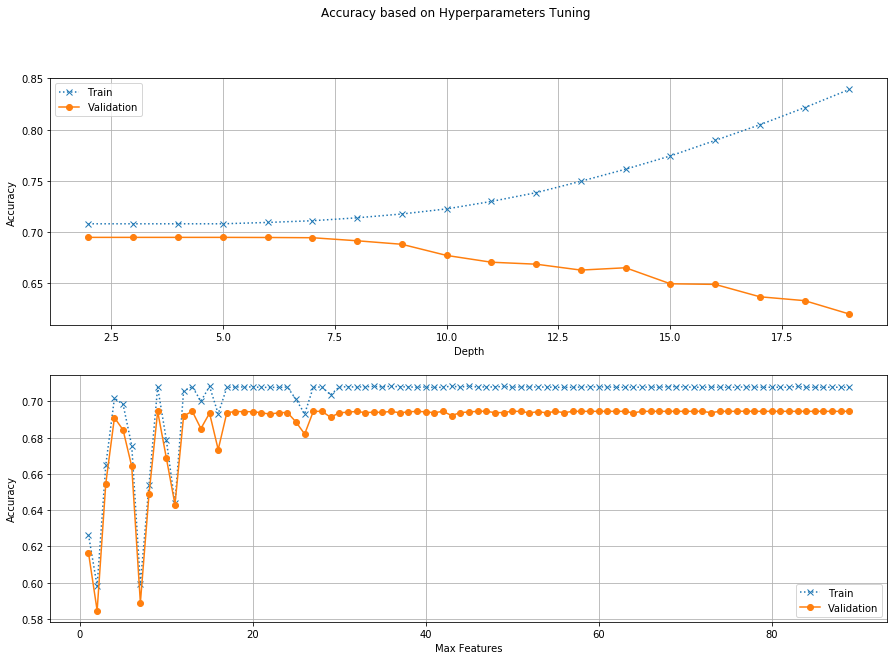

In [3]:
%%time
tree_best_features = valop.validate_tree_classifier(dataframe)

Wall time: 2min 22s


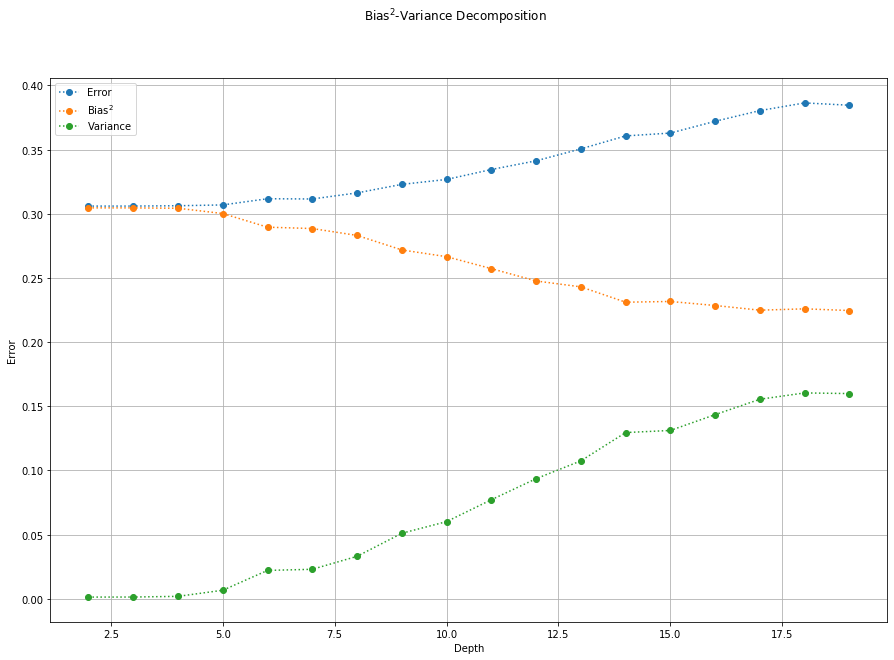

In [3]:
%%time
from sklearn.tree import DecisionTreeClassifier
valop.plot_tree_variance_bias_decomposition(dataframe)

# IL BIAS e LA VARIANZA SONO PIUTTOSTO BASSI PER L'ALBERO CHE ABBIAMO COSTRUITO

Best Number of Estimators: 75 - Accuracy: 0.6939096954847742
Wall time: 2min 54s


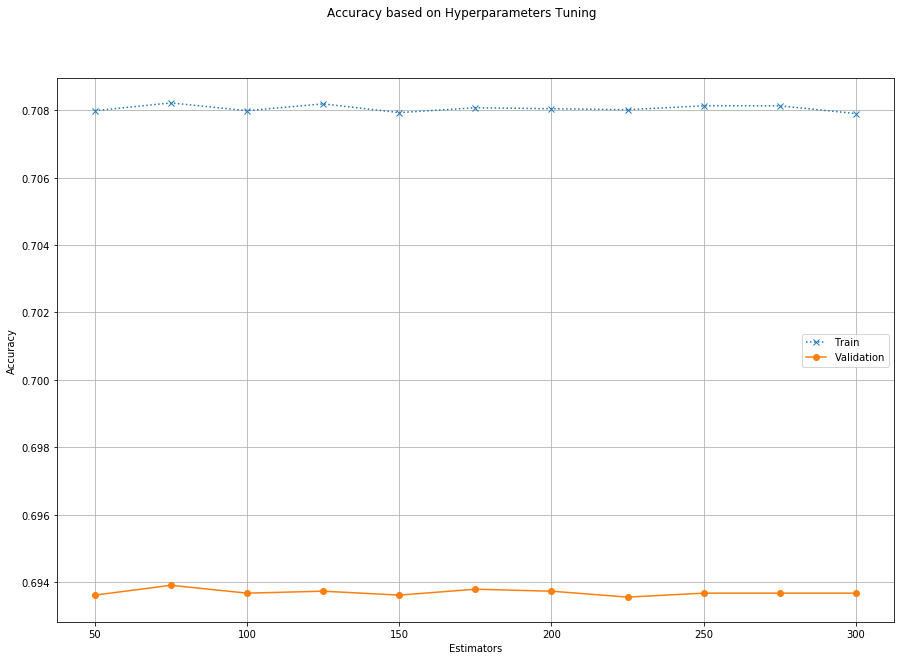

In [5]:
%%time
bagged_tree_best_n_estimators = valop.validate_bagged_tree_classifier(dataframe, tree_best_features)

Wall time: 3min 20s


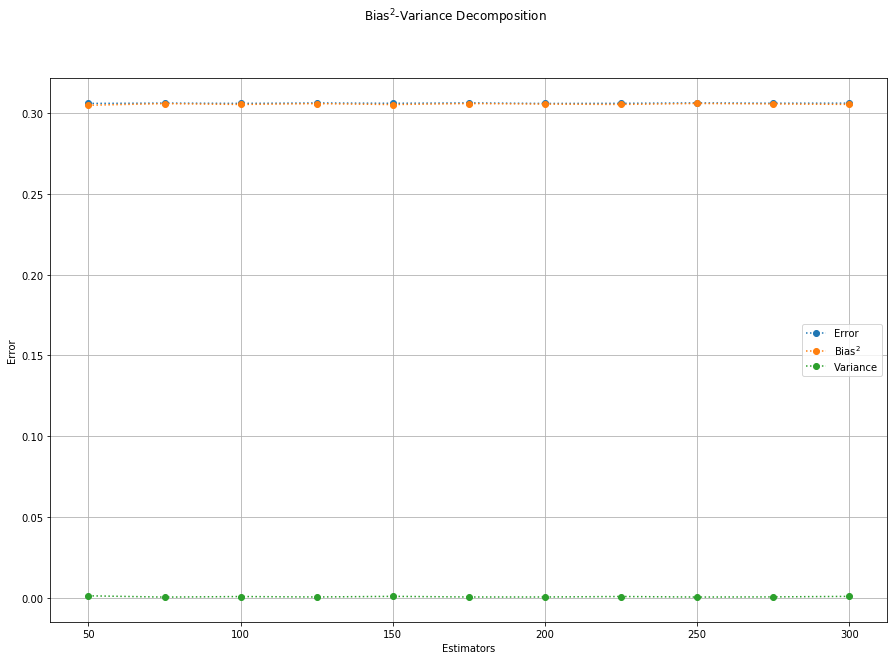

In [4]:
%%time
valop.get_bagged_tree_variance_bias_decomposition(dataframe, DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']))

#IL BAGGING RIDUCE UN PO' LA VARIANZA, MA PARE AUMENTARE IL BIAS

Best Number of Estimators: 2 - Accuracy: 0.69326799673317
Wall time: 47.5 s


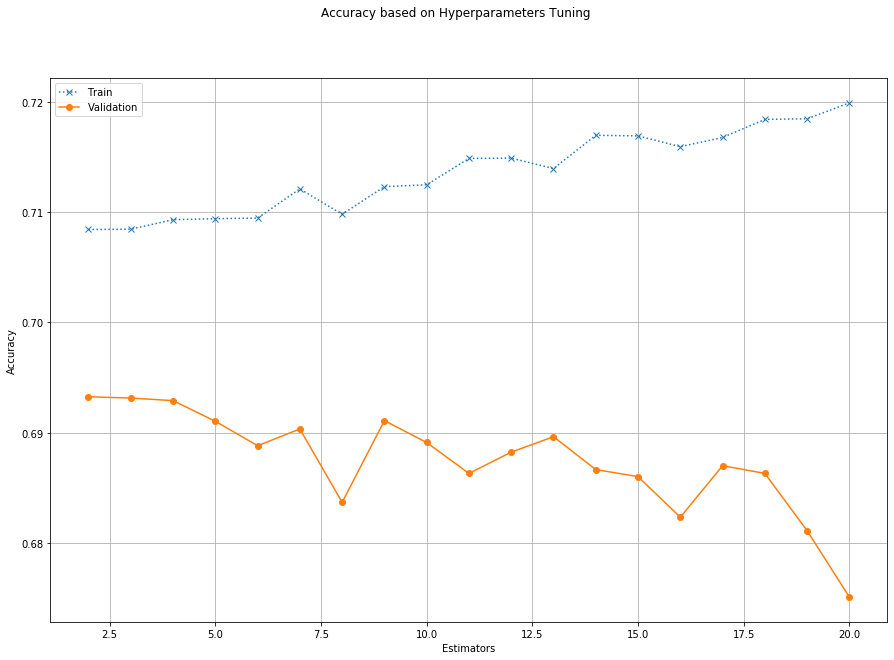

In [5]:
%%time
boosted_tree_best_n_estimators = valop.get_best_boosted_tree_n_estimators(dataframe, tree_best_features)

Wall time: 32.3 s


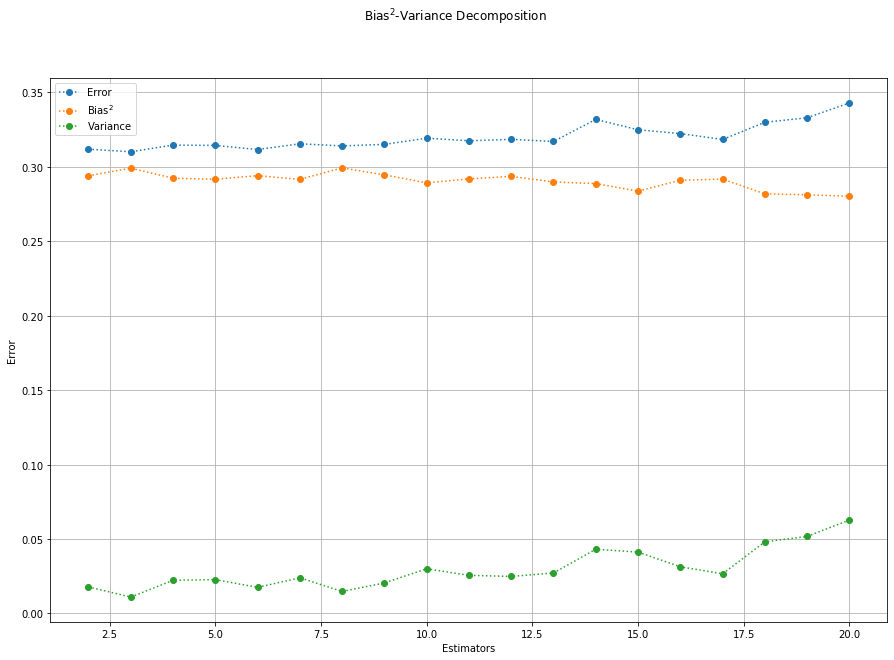

In [4]:
%%time
valop.get_boosted_tree_variance_bias_decomposition(dataframe, DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']))

# LA BIAS RIMANE PIù O MENO INVARIATA, IL TUNING DEGLI IPERPARAMETRI E' STATO EFFICIENTE

Best Estimators Number 150 - Accuracy: 0.6642748804106872
Best Depth 12 - Accuracy: 0.6942013767355034
Wall time: 2min 10s


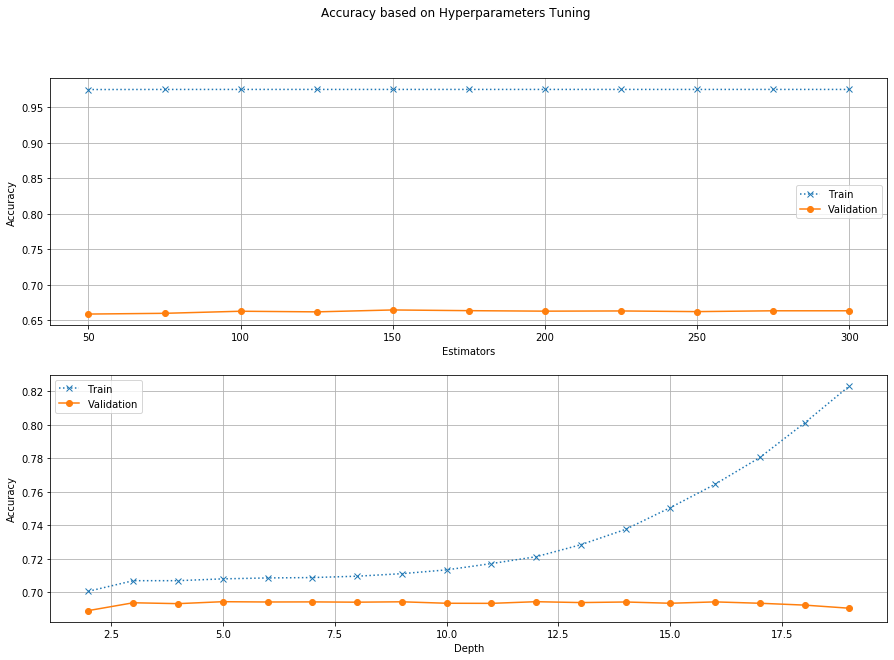

In [3]:
%%time
forest_best_features = valop.validate_forest_classifier(dataframe)

#Miglioramento dell'accuratezza! Con l'aumento della depth, foresta più fully grown migliora l'accuratezza al contrario di quanto accadeva
#all'inizio!

Wall time: 8min 46s


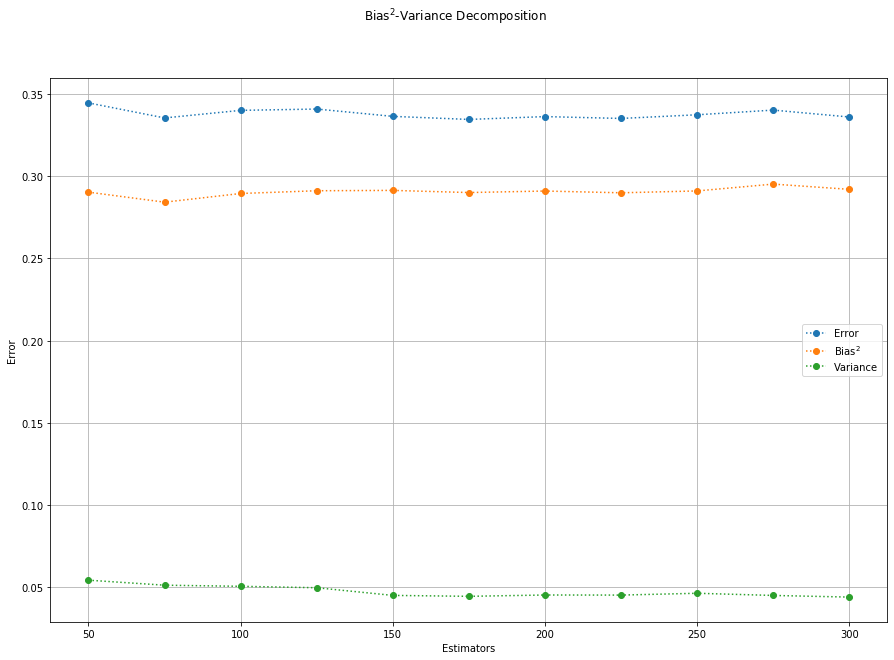

In [3]:
%%time
valop.get_forest_variance_bias_decomposition(dataframe)

# SICURAMENTE LA FORESTA FA UN LAVORO MIGLIORE DI UN ALBERO FULLY GROWN,
# LA VARIANZA RESTA COSTANTE, PEGGIORANDO UN PO' PERCHE' GLI ALBERI SONO FULLY GROWN, 
# IL BIAS VIENE MANTENUTO COSTANTE, 
# NON SI RIESCE AD ABBASSARE DI MOLTO

Wall time: 3min 39s


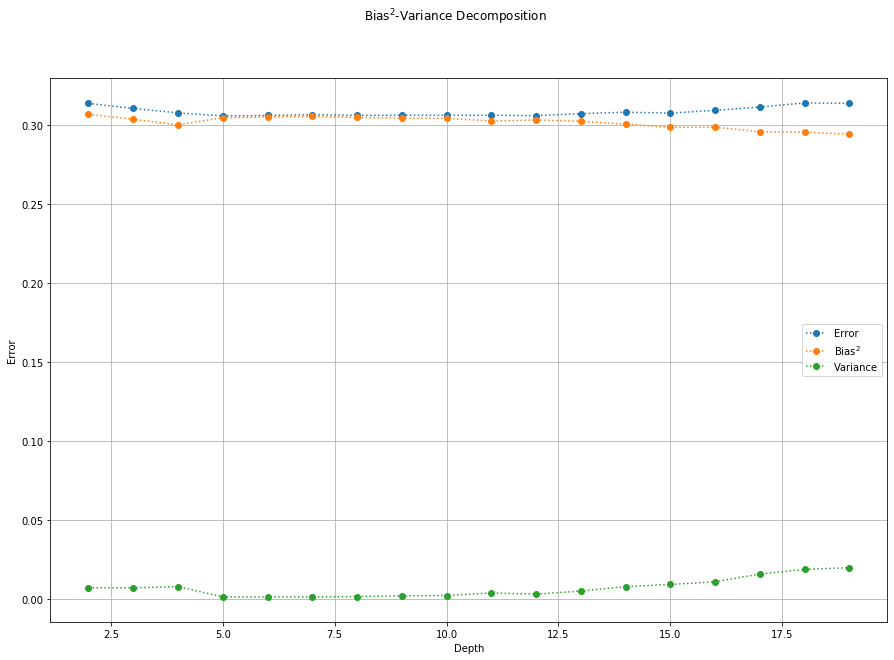

In [4]:
%%time
valop.get_forest_variance_bias_decomposition(dataframe, forest_best_features['n_estimators'])
# LA FORESTA COL TUNING DEI PARAMETRI PORTA AD UN RISULTATO SIMILE RISPETTO ALL'ALBERO,
# GLI ALBERI NON FULLY GROWN HANNO UNA VARIANZA PIU' BASSA NEL BIAS DECOMPOSITION SOPRA, 
# IL BIAS SI ALZA UN PO' RISPETTO ALLA FORESTA SENZA TUNING DELLA PROFONDITA' PERCHE GLI ALBERI NON SONO FULLY GROWN,
# NEL COMPLESSO L'ERRORE E' PERO' MINORE ED E' MEGLIO SCEGLIER QUESTO MODELLO.

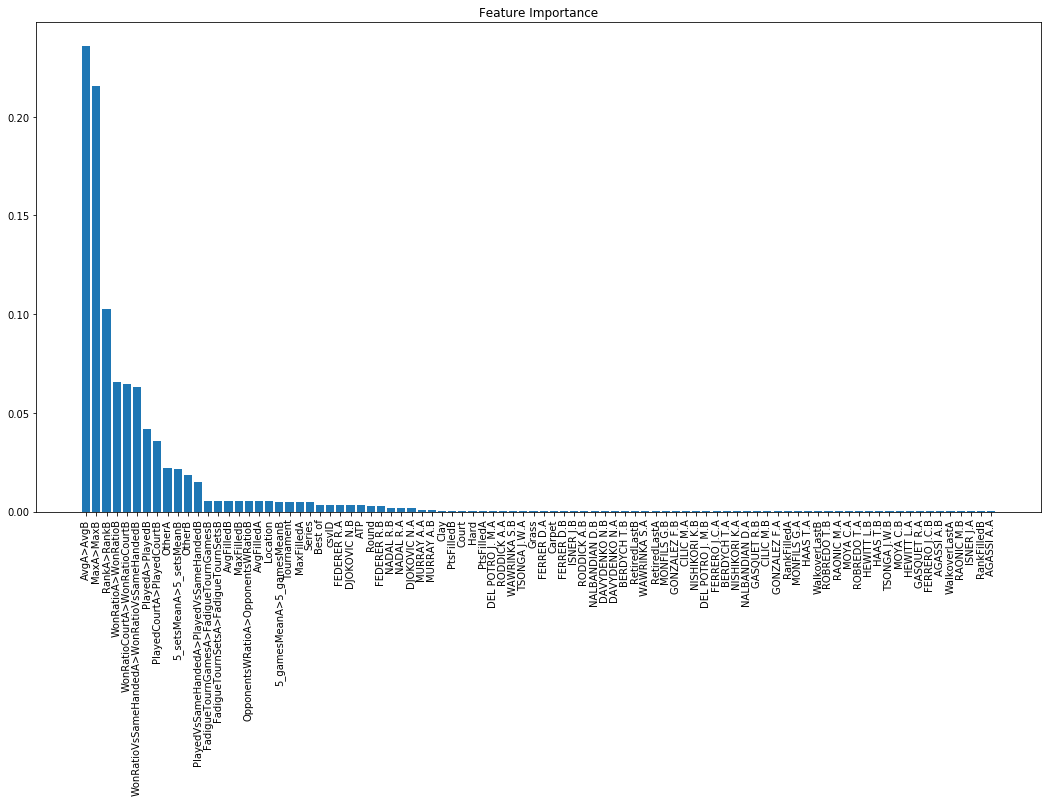

Wall time: 9.99 s


In [10]:
%%time

import matplotlib.pyplot as plt

x = dataframe.loc[:, dataframe.columns != 'Winner']
y = dataframe['Winner']

rf = RandomForestClassifier(n_estimators = forest_best_features['n_estimators'], max_depth = forest_best_features['max_depth'])

rf.fit(x,y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = [x.columns[i] for i in indices]

plt.figure(figsize=(18,9))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices])
plt.xticks(range(x.shape[1]), features, rotation=90)
plt.show()

In [11]:
%%time
from sklearn.feature_selection import RFE

#df = df.head(1000)



selector = RFE(rf, step=5, n_features_to_select=None)

selector.fit(x,y)
selector.support_

Wall time: 1min 20s


array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [12]:
features = x.columns.values[selector.support_]

features = np.append(features,['Winner'])

print('Selected features (total:', dataframe.shape[1], ')-> ', len(features))
print(features)

Selected features (total: 91 )->  46
['csvID' 'ATP' 'Location' 'Tournament' 'Series' 'Court' 'Round' 'Best of'
 'PtsFilledA' 'PtsFilledB' 'MaxFilledA' 'MaxFilledB' 'AvgFilledA'
 'AvgFilledB' 'Clay' 'Grass' 'Hard' 'FEDERER R.A' 'FEDERER R.B'
 'NADAL R.A' 'NADAL R.B' 'DJOKOVIC N.A' 'DJOKOVIC N.B' 'MURRAY A.A'
 'MURRAY A.B' 'DEL POTRO J. M.A' 'NALBANDIAN D.B' 'ISNER J.B' 'OtherA'
 'OtherB' 'RankA>RankB' 'MaxA>MaxB' 'AvgA>AvgB'
 'OpponentsWRatioA>OpponentsWRatioB'
 'FadigueTournGamesA>FadigueTournGamesB'
 'FadigueTournSetsA>FadigueTournSetsB' 'RetiredLastB' 'PlayedA>PlayedB'
 'WonRatioA>WonRatioB' 'PlayedCourtA>PlayedCourtB'
 'WonRatioCourtA>WonRatioCourtB' '5_gamesMeanA>5_gamesMeanB'
 '5_setsMeanA>5_setsMeanB' 'PlayedVsSameHandedA>PlayedVsSameHandedB'
 'WonRatioVsSameHandedA>WonRatioVsSameHandedB' 'Winner']


Best Estimators Number 200 - Accuracy: 0.6629331466573328
Best Depth 11 - Accuracy: 0.6943180492357951
Wall time: 1min 50s


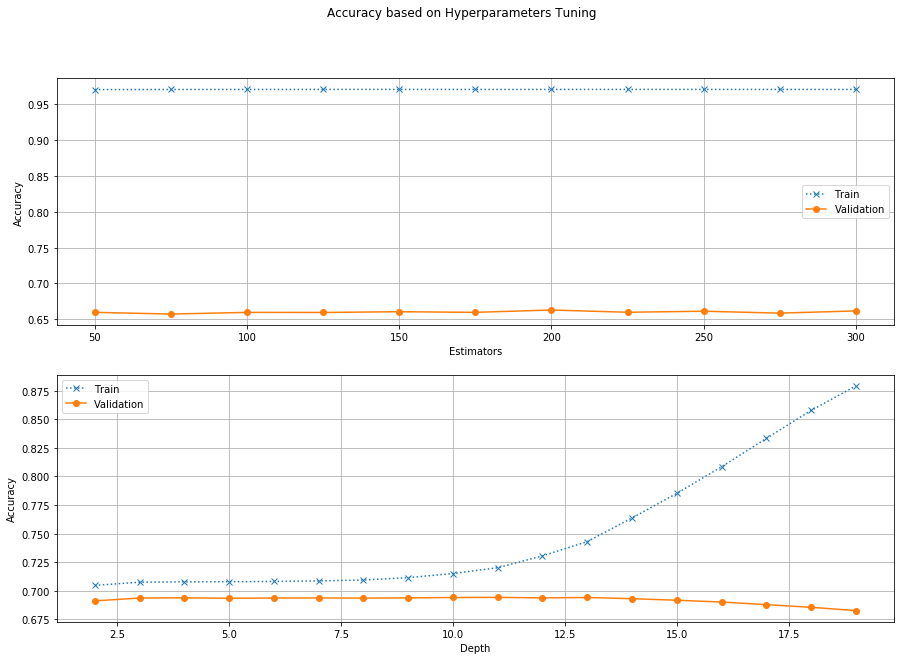

In [13]:
%%time
recursive_forest_best_features = valop.validate_forest_classifier(dataframe[features])

In [ ]:
'''from sklearn.feature_selection import RFE

rf_small = RandomForestClassifier(n_estimators=20)
selector = RFE(rf_small, 
                 step=1, # features removed at each step
                 n_features_to_select=1 # selected features
                )
fit = selector.fit(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'])
                                                        '''

In [ ]:
#accuracy_score(y_true=dataframe['Winner'], y_pred=rf.predict(fit.predict(dataframe.loc[:, dataframe.columns != 'Winner'])))